    population
0       6.1101
1       5.5277
2       8.5186
3       7.0032
4       5.8598
..         ...
92      5.8707
93      5.3054
94      8.2934
95     13.3940
96      5.4369

[97 rows x 1 columns]
      profit
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
..       ...
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]
best_fit_x [ 0.          1.31578947  2.63157895  3.94736842  5.26315789  6.57894737
  7.89473684  9.21052632 10.52631579 11.84210526 13.15789474 14.47368421
 15.78947368 17.10526316 18.42105263 19.73684211 21.05263158 22.36842105
 23.68421053 25.        ]


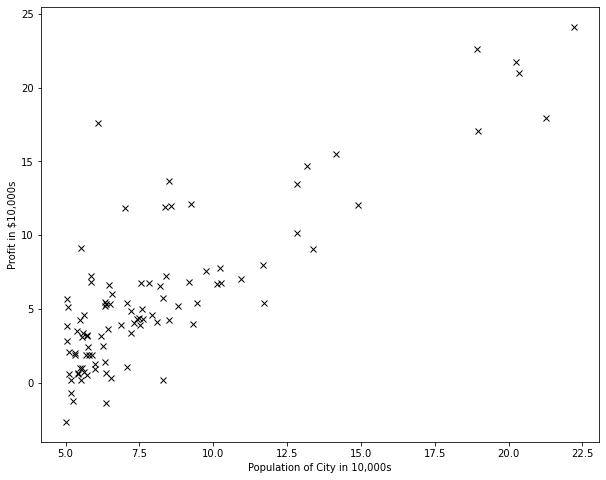

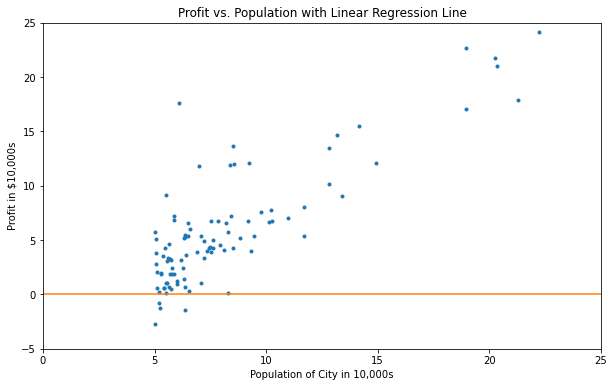

In [19]:
import pandas as pd;
import matplotlib.pyplot as plt
import numpy as np

p = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

# Split population and profit in separate variable
population = pd.DataFrame(p.population)
profit = pd.DataFrame(p.profit)
m = len(profit)

print(population)
print(profit)

# Plot the data using matplotlib.pyplot.plot( ) function as

plt.figure(figsize=(10,8))
plt.plot(population, profit, 'kx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# For gradient descent
iter = 1000
alpha = 0.01

population['intercept'] = 1
X = np.array(population)
y = np.array(profit).flatten()
theta = np.array([0, 0])


# Define function for cost Linear regression and gradient descent
def cost_function(X, y, theta):
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)

        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history


cost_function(X, y, theta)
gd = gradient_descent(X,y,theta,alpha, iter)
best_fit_x = np.linspace(0, 25, 20)
print('best_fit_x', best_fit_x)
best_fit_y = [theta[1] + theta[0]*xx for xx in best_fit_x]

plt.figure(figsize=(10,6))
plt.plot(population.population, profit, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.axis([0,25,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line')
plt.show()

